In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


- The observations in a stationary time series are not dependent on time.
- Time series are stationary if they do not have trend or seasonal effects.
- When a time series is stationary, it can be easier to model. 
- Statistical modeling methods assume or require the time series to be stationary to be effective

### An example of the Daily Female Births dataset that is stationary

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


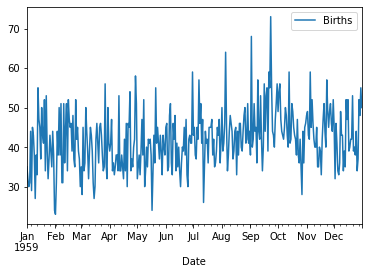

In [31]:
df = pd.read_csv('../Data/daily-total-female-births.csv', index_col=0, parse_dates=True)
df.plot();
df.head()

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

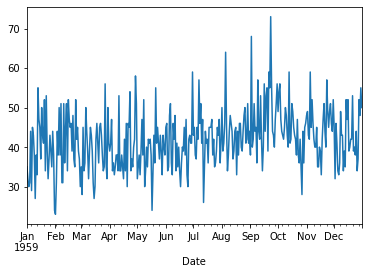

In [26]:
df1 = pd.read_csv('../Data/daily-total-female-births.csv',header=0, index_col=0, parse_dates=True,squeeze=True)
df1.plot();
df1.head()

In [27]:
type(df1)

pandas.core.series.Series

### An example of the Airline Passengers dataset that is non-stationary

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


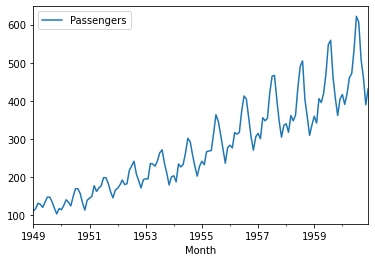

In [32]:
df2 = pd.read_csv('../Data/airline-passengers.csv', index_col=0, parse_dates=True)
df2.plot();
df2.head()

Should you make your time series stationary? Generally, yes. If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.

-  If we fit a stationary model to data, we assume our data are a realization of a stationary process. So our first step in an analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them.

## Checks for Stationarity

- Look at Plots: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
- Summary Statistics: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
- Statistical Tests: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

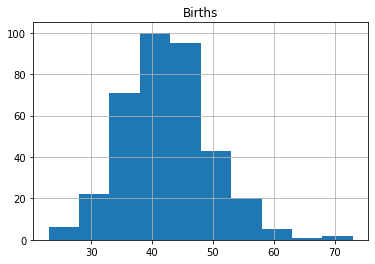

In [34]:
df.hist();

In [43]:
X = df.values
split=int(len(X)/2)
X1,X2=X[0:split], X[split:]

split

182

In [47]:
mean1, mean2=X1.mean(), X2.mean()

mean1

39.76373626373626

In [48]:
mean2

44.185792349726775

In [51]:
mean1,mean2

(39.76373626373626, 44.185792349726775)

In [54]:
var1,var2 = X1.var() , X2.var() 

In [55]:
var1,var2

(49.21341021615746, 48.708650601690096)

In [56]:
print('mean1=%f, mean2=%f' % (mean1, mean2)) 
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


In [59]:
X = df2.values
split=int(len(X)/2)
X1,X2=X[0:split], X[split:]

mean1, mean2=X1.mean(), X2.mean()
var1,var2 = X1.var() , X2.var() 

print('mean1=%f, mean2=%f' % (mean1, mean2)) 
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

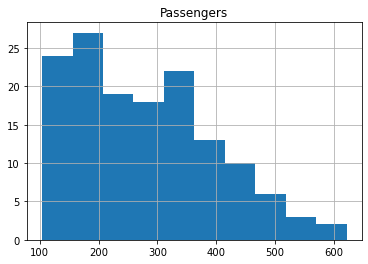

In [60]:
df2.hist()

- The example shows that indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful. 
- This squashed distribution of the observations may be another indicator of a non-stationary time series.

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing. This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship

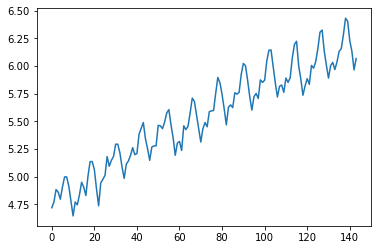

In [66]:
X=df2.values
X=np.log(X)
plt.plot(X);

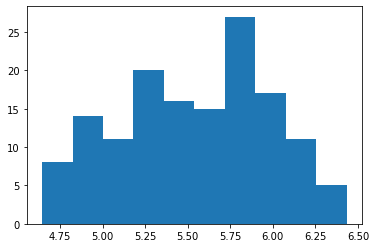

In [70]:
plt.hist(X);

Running the example, we can see the more familiar Gaussian-like or Uniform-like distribution of values.

In [76]:
split=int(len(X)/2)
X1,X2=X[0:split], X[split:]

mean1, mean2= X1.mean(),X2.mean()
var1, var2= X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2)) 
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


In [81]:
from statsmodels.tsa.stattools import adfuller

X = df2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [82]:
X = df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
